[Dataset Link](https://zenodo.org/records/3941387)

## Load the Data into Pandas DataFrames

### Steps Explanation:

1. **Mount Google Drive**: The `drive.mount('/content/drive')` function will ask for authorization to access your Google Drive. After you authorize, it will be accessible within the Colab environment.
2. **Unzip the ZIP file**: The code unzips the ZIP file to a specific folder on Google Drive (`extraction_dir`). Make sure you provide the correct path for both the ZIP file and the extraction directory.
3. **Process the CSV Files**: The CSV files are read and processed, adding `subreddit` and `timeframe` as columns to identify the source of each file.
4. **Concatenate DataFrames**: The DataFrames are combined into one large DataFrame (`data_df`).

### Notes:
- Replace `path_to_your_zip_file.zip` and `path_to_extract_csv_files/` with the actual path to the ZIP file and the directory where you want to extract the CSV files in Google Drive.
- Once the data is loaded into `data_df`, you can proceed with your analysis.

In [1]:
import pandas as pd
import glob
import zipfile
import os

# Define the path to the ZIP file in Google Drive
zip_file_path = '/Users/mgmanjusha/Downloads/3941387.zip'

# Define the extraction directory
extraction_dir = '/Users/mgmanjusha/Downloads/path_to_extract_csv_files/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# Define the path where your CSV files are now stored
path = extraction_dir

# Get a list of all CSV files
all_files = glob.glob(path + "*_features_tfidf_256.csv")

# Initialize an empty list to hold DataFrames
df_list = []

# Load each CSV file into a DataFrame
for filename in all_files:
    df = pd.read_csv(filename)

    # Extract subreddit and timeframe from the filename
    base_name = filename.split('/')[-1]  # Get filename without the path
    subreddit = base_name.split('_')[0]
    timeframe = base_name.split('_')[1]

    # Add subreddit and timeframe as columns
    df['subreddit'] = subreddit
    df['timeframe'] = timeframe

    df_list.append(df)

# Concatenate all DataFrames into one
data_df = pd.concat(df_list, ignore_index=True)

# Now `data_df` contains all the data from the CSV files with subreddit and timeframe columns
data_df.head()

/Users/mgmanjusha/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


subreddit              author        date  \
0      guns        TrickyWidget  2019/08/29   
1      guns            Phonkboi  2019/08/29   
2      guns         civildallas  2019/08/29   
3      guns            alphenos  2019/08/29   
4      guns  ThePrince_OfWhales  2019/08/29   

                                                post  \
0  Bersa Thunder 22: Long-term reliability? Hi, f...   
1  Anybody have any experience with the diamondba...   
2  Old &amp; New // Colt 1911 &amp; MCX Rattler I...   
3  Start working in a gun shop next week. Need so...   
4  Cheap targets for plinking? I'm headed to the ...   

   automated_readability_index  coleman_liau_index  \
0                     1.694871            4.006924   
1                     3.878479            6.348434   
2                     1.706820            1.779508   
3                     2.410000            4.759872   
4                     3.741667            6.717733   

   flesch_kincaid_grade_level  flesch_reading_ease  gulpease_index  \
0                    3.778527            84.991925       81.441860   
1                    6.311336            57.701290      107.709677   
2                    1.327278            91.199780      137.767123   
3                    3.387778            88.585000       79.000000   
4                    3.325556            87.250000       78.444444   

   gunning_fog_index  ...  tfidf_without  tfidf_wonder  tfidf_work  \
0           5.682687  ...            0.0      0.000000    0.000000   
1          10.803687  ...            0.0      0.460018    0.000000   
2           4.009291  ...            0.0      0.000000    0.000000   
3           6.222222  ...            0.0      0.000000    0.270302   
4           5.266667  ...            0.0      0.000000    0.000000   

   tfidf_worri  tfidf_wors  tfidf_would  tfidf_wrong  tfidf_x200b  tfidf_year  \
0          0.0         0.0     0.000000          0.0          0.0    0.180184   
1          0.0         0.0     0.000000          0.0          0.0    0.000000   
2          0.0         0.0     0.000000          0.0          0.0    0.000000   
3          0.0         0.0     0.263752          0.0          0.0    0.000000   
4          0.0         0.0     0.000000          0.0          0.0    0.000000   

   timeframe  
0        pre  
1        pre  
2        pre  
3        pre  
4        pre  

[5 rows x 351 columns]

In [2]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107302 entries, 0 to 1107301
Columns: 351 entries, subreddit to timeframe
dtypes: float64(270), int64(76), object(5)
memory usage: 2.9+ GB


In [3]:
# Analysis of `subreddit`, `author`, `date`, and `post`

# 1. **Subreddit Distribution** - Count posts per subreddit
subreddit_counts = data_df['subreddit'].value_counts()

# Data Preprocessing: Ensure 'date' is in datetime format
data_df['date'] = pd.to_datetime(data_df['date'], errors='coerce')

# 2. **Post Frequency Over Time** - Posts per month
data_df['month'] = data_df['date'].dt.to_period('M')
posts_per_month = data_df.groupby('month').size()

# 3. **Most Active Users** - Count posts per user (author)
author_activity = data_df['author'].value_counts()

# 4. **Sample Content Analysis** - First few rows of the 'post' column for text analysis
sample_posts = data_df[['author', 'post']].head()

# 5. **Trend Analysis** - Posts in each subreddit over time
posts_per_subreddit_per_month = data_df.groupby(['subreddit', 'month']).size().unstack(fill_value=0)

# Output Results
print("Subreddit Post Count:\n", subreddit_counts)
print('*'*80)
print("\nPosts per Month:\n", posts_per_month)
print('*'*80)
print("\nMost Active Users:\n", author_activity.head(10))
print('*'*80)
print("\nPosts per Subreddit per Month:\n", posts_per_subreddit_per_month)

Subreddit Post Count:
 subreddit
legaladvice        164233
personalfinance    128138
depression         117331
jokes               94505
relationships       77223
suicidewatch        66161
anxiety             57671
fitness             49844
adhd                45631
mentalhealth        45332
parenting           33868
conspiracy          29847
bpd                 24294
lonely              23635
socialanxiety       22996
guns                22973
meditation          16475
EDAnonymous         14577
divorce             12594
autism               8869
schizophrenia        8712
healthanxiety        8648
ptsd                 8643
addiction            7641
alcoholism           5911
bipolarreddit        5780
teaching             4789
COVID19               981
Name: count, dtype: int64
********************************************************************************

Posts per Month:
 month
2018-01     53140
2018-02     44480
2018-03     45637
2018-04     33832
2018-11     24537
2018-12     23374

#### 1. **Subreddit Distribution** - Count posts per subreddit

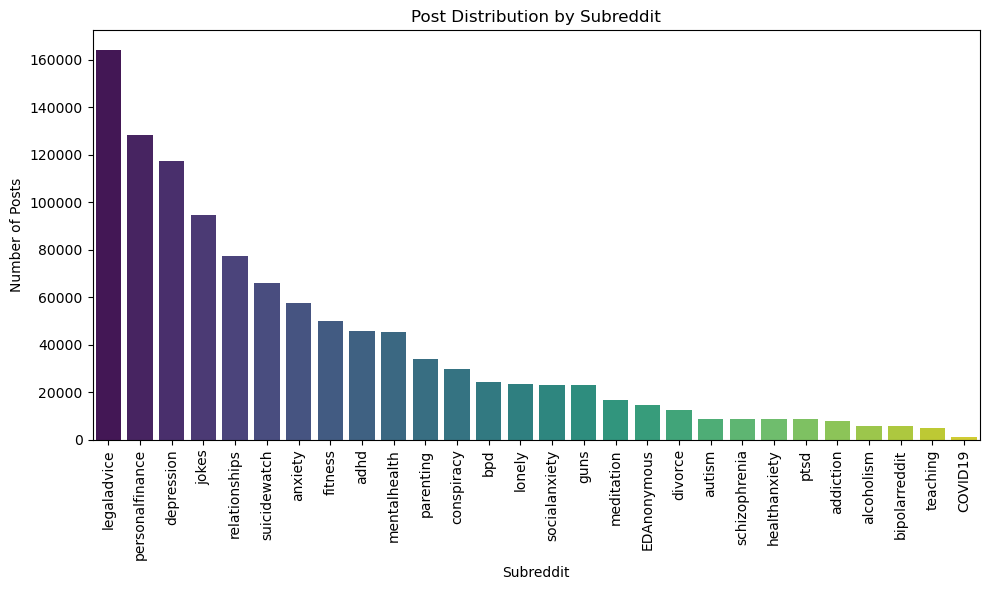

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

subreddit_counts = data_df['subreddit'].value_counts()

# Plotting Subreddit Post Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, palette='viridis')
plt.title('Post Distribution by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 2. **Post Frequency Over Time** - Posts per month

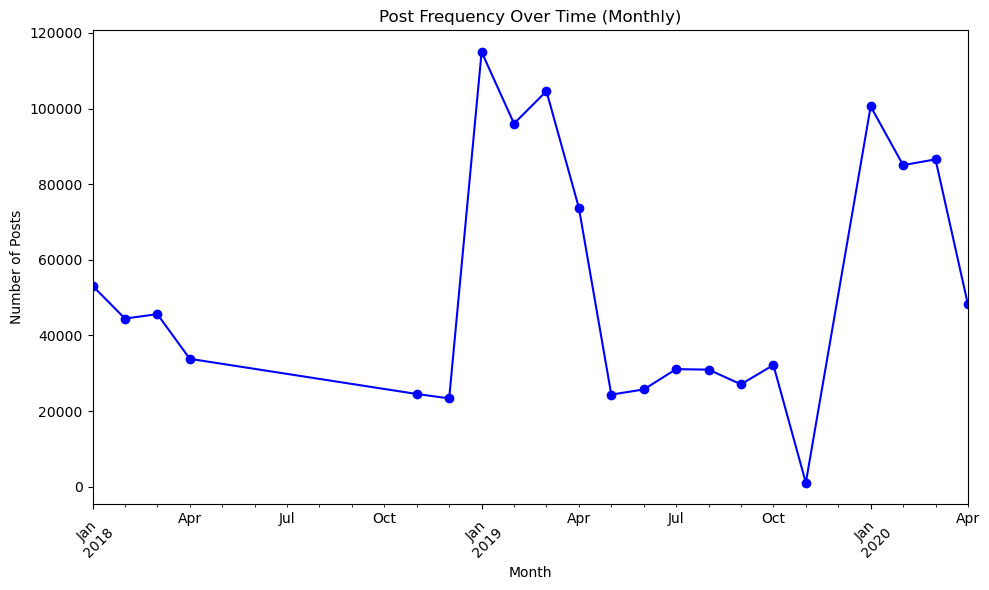

In [5]:
posts_per_month = data_df.groupby('month').size()

# Plotting Post Frequency Over Time
plt.figure(figsize=(10, 6))
posts_per_month.plot(kind='line', marker='o', color='b')
plt.title('Post Frequency Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 3. **Most Active Users** - Count posts per user (author)

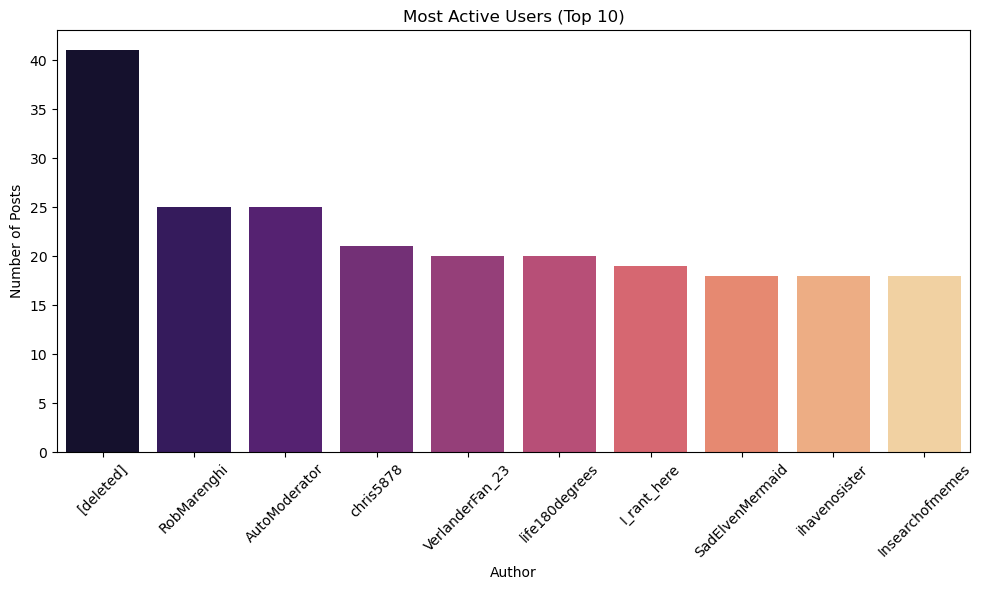

In [6]:
author_activity = data_df['author'].value_counts().head(10)

# Plotting Most Active Users
plt.figure(figsize=(10, 6))
sns.barplot(x=author_activity.index, y=author_activity.values, palette='magma')
plt.title('Most Active Users (Top 10)')
plt.xlabel('Author')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 4. **Trend Analysis** - Posts per subreddit over time

<Figure size 1200x800 with 0 Axes>

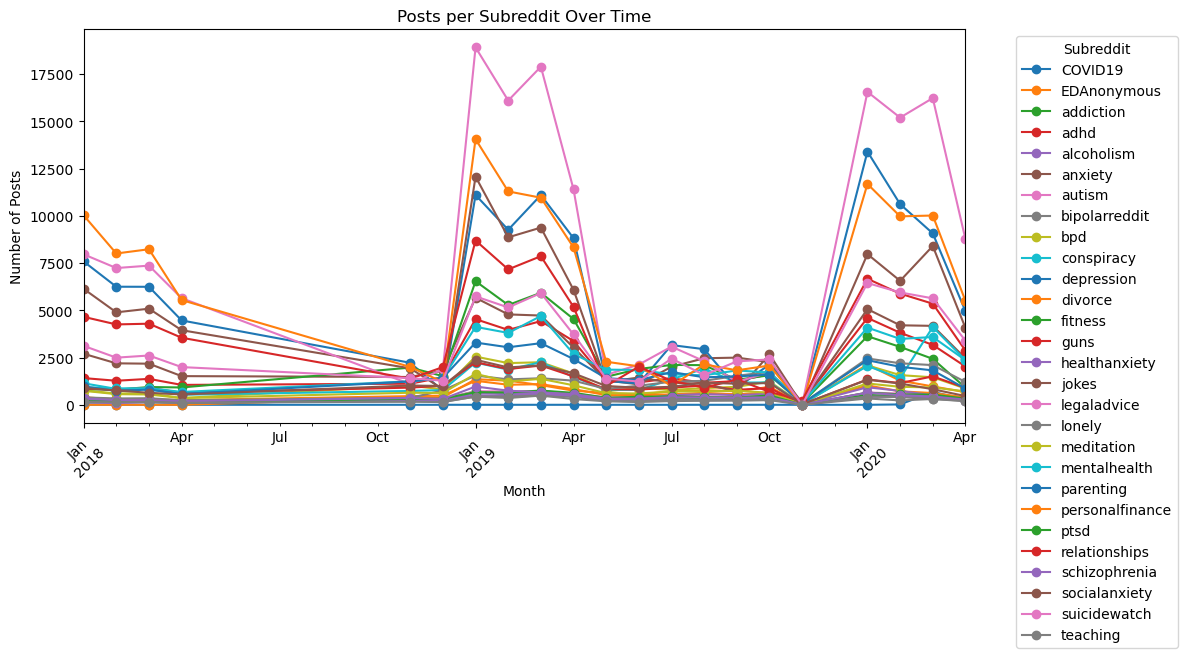

In [7]:
posts_per_subreddit_per_month = data_df.groupby(['subreddit', 'month']).size().unstack(fill_value=0)

# Plotting Posts per Subreddit Over Time
plt.figure(figsize=(12, 8))
posts_per_subreddit_per_month.T.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Posts per Subreddit Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Plot frequency of top 10 most common TF-IDF terms

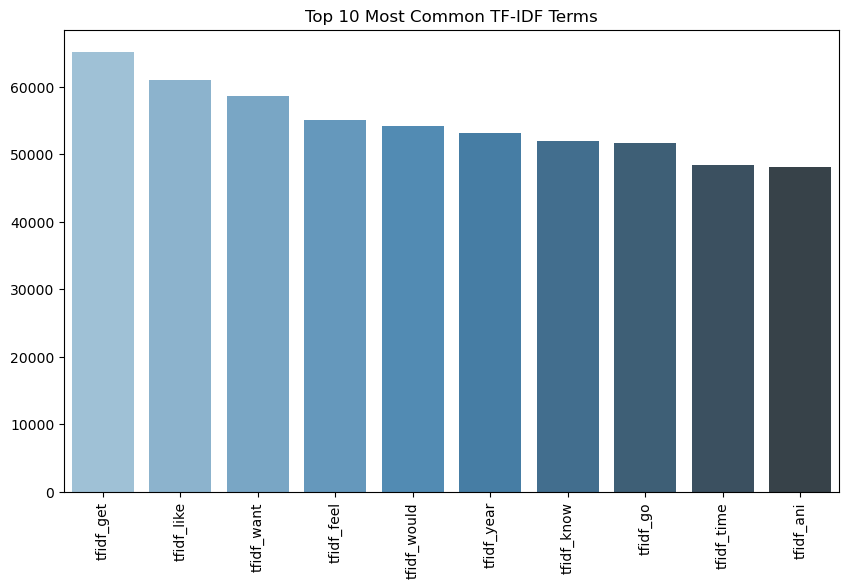

In [8]:
tfidf_terms = [col for col in data_df.columns if col.startswith('tfidf_')]
tfidf_term_freq = data_df[tfidf_terms].sum(axis=0).sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=tfidf_term_freq.index, y=tfidf_term_freq.values, palette='Blues_d')
plt.title('Top 10 Most Common TF-IDF Terms')
plt.xticks(rotation=90)
plt.show()

## 1. **Clustering Posts (Gaussian Mixture Models)**

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import LatentDirichletAllocation

In [10]:
# Convert column names to a list and print
print(list(data_df.columns))

['subreddit', 'author', 'date', 'post', 'automated_readability_index', 'coleman_liau_index', 'flesch_kincaid_grade_level', 'flesch_reading_ease', 'gulpease_index', 'gunning_fog_index', 'lix', 'smog_index', 'wiener_sachtextformel', 'n_chars', 'n_long_words', 'n_monosyllable_words', 'n_polysyllable_words', 'n_sents', 'n_syllables', 'n_unique_words', 'n_words', 'sent_neg', 'sent_neu', 'sent_pos', 'sent_compound', 'economic_stress_total', 'isolation_total', 'substance_use_total', 'guns_total', 'domestic_stress_total', 'suicidality_total', 'punctuation', 'liwc_1st_pers', 'liwc_2nd_pers', 'liwc_3rd_pers', 'liwc_achievement', 'liwc_adverbs', 'liwc_affective_processes', 'liwc_anger', 'liwc_anxiety', 'liwc_articles_article', 'liwc_assent', 'liwc_auxiliary_verbs', 'liwc_biological', 'liwc_body', 'liwc_causation', 'liwc_certainty', 'liwc_cognitive', 'liwc_common_verbs', 'liwc_conjunctions', 'liwc_death', 'liwc_discrepancy', 'liwc_exclusive', 'liwc_family', 'liwc_feel', 'liwc_fillers', 'liwc_frien

In [11]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Select relevant numeric columns from the dataset for clustering
# We'll use a subset of columns that are numeric, like readability indices, sentiment scores, and LIWC features

numeric_columns = [
    'automated_readability_index', 'coleman_liau_index', 'flesch_kincaid_grade_level',
    'flesch_reading_ease', 'gulpease_index', 'gunning_fog_index', 'lix', 'smog_index',
    'wiener_sachtextformel', 'n_chars', 'n_long_words', 'n_monosyllable_words',
    'n_polysyllable_words', 'n_sents', 'n_syllables', 'n_unique_words', 'n_words',
    'sent_neg', 'sent_neu', 'sent_pos', 'sent_compound', 'economic_stress_total',
    'isolation_total', 'substance_use_total', 'guns_total', 'domestic_stress_total',
    'suicidality_total', 'punctuation', 'liwc_1st_pers', 'liwc_2nd_pers', 'liwc_3rd_pers',
    'liwc_achievement', 'liwc_adverbs', 'liwc_affective_processes', 'liwc_anger',
    'liwc_anxiety', 'liwc_articles_article', 'liwc_assent', 'liwc_auxiliary_verbs',
    'liwc_biological', 'liwc_body', 'liwc_causation', 'liwc_certainty', 'liwc_cognitive',
    'liwc_common_verbs', 'liwc_conjunctions', 'liwc_death', 'liwc_discrepancy',
    'liwc_exclusive', 'liwc_family', 'liwc_feel', 'liwc_fillers', 'liwc_friends',
    'liwc_future_tense', 'liwc_health', 'liwc_hear', 'liwc_home', 'liwc_humans',
    'liwc_impersonal_pronouns', 'liwc_inclusive', 'liwc_ingestion', 'liwc_inhibition',
    'liwc_insight', 'liwc_leisure', 'liwc_money', 'liwc_motion', 'liwc_negations',
    'liwc_negative_emotion', 'liwc_nonfluencies', 'liwc_numbers', 'liwc_past_tense',
    'liwc_perceptual_processes', 'liwc_personal_pronouns', 'liwc_positive_emotion',
    'liwc_prepositions', 'liwc_present_tense', 'liwc_quantifiers', 'liwc_relativity',
    'liwc_religion', 'liwc_sadness', 'liwc_see', 'liwc_sexual', 'liwc_social_processes',
    'liwc_space', 'liwc_swear_words', 'liwc_tentative', 'liwc_time', 'liwc_total_functional',
    'liwc_total_pronouns', 'liwc_work'
]

# Filter only the numeric columns
X = data_df[numeric_columns].dropna()  # Drop rows with NaN values to ensure clean data

# Step 2: Standardize the data to ensure each feature has similar scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply Gaussian Mixture Models (GMM) for clustering
num_clusters = 10  # Number of clusters to form, can be tuned
gmm = GaussianMixture(n_components=num_clusters, covariance_type='full', random_state=42)
cluster_labels = gmm.fit_predict(X_scaled)

# Step 4: Add cluster labels to the dataframe
data_df['cluster'] = cluster_labels

# Display the top 5 rows with cluster labels
print(data_df[['author', 'post', 'cluster']].head())

               author                                               post  \
0        TrickyWidget  Bersa Thunder 22: Long-term reliability? Hi, f...   
1            Phonkboi  Anybody have any experience with the diamondba...   
2         civildallas  Old &amp; New // Colt 1911 &amp; MCX Rattler I...   
3            alphenos  Start working in a gun shop next week. Need so...   
4  ThePrince_OfWhales  Cheap targets for plinking? I'm headed to the ...   

   cluster  
0        7  
1        7  
2        0  
3        0  
4        7  


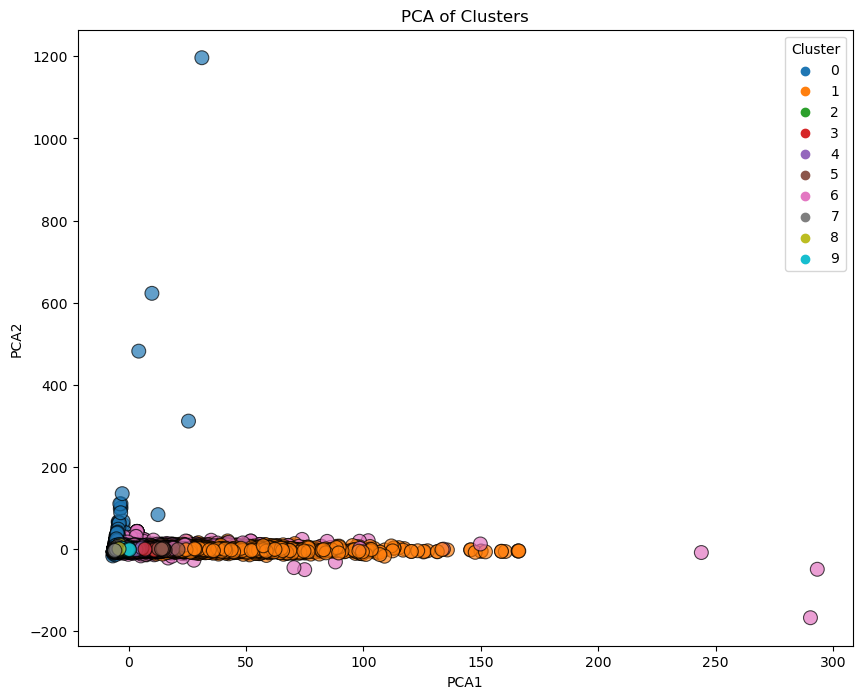

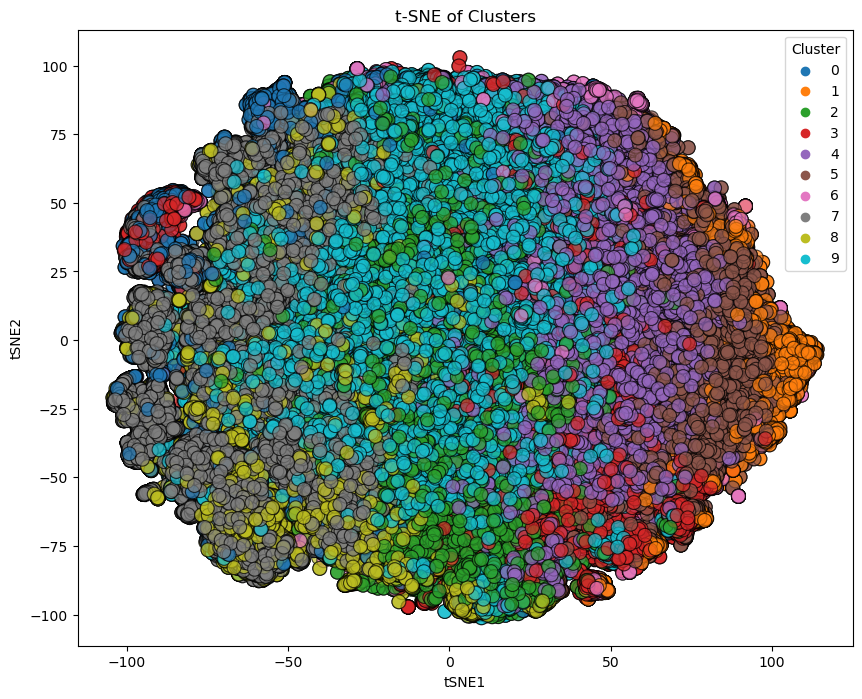

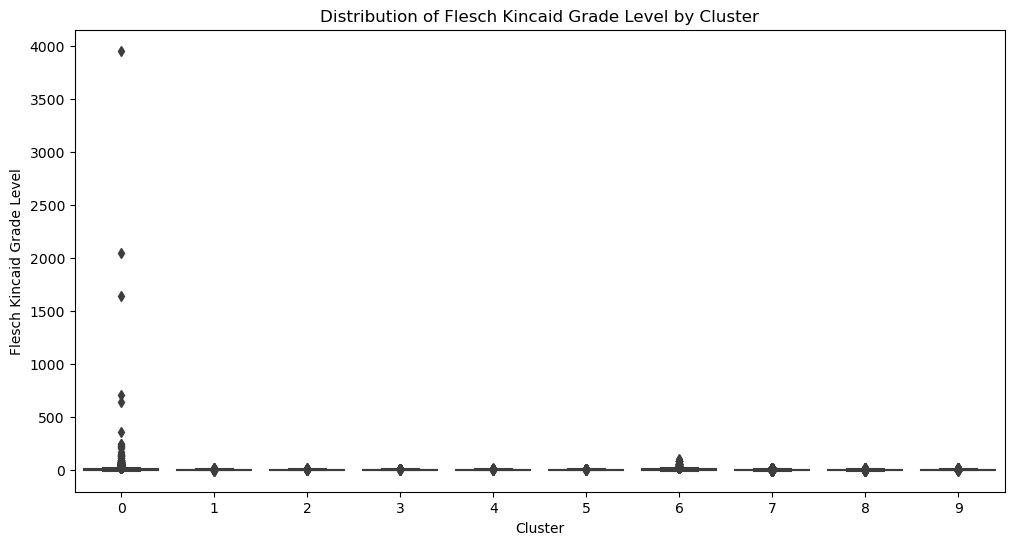

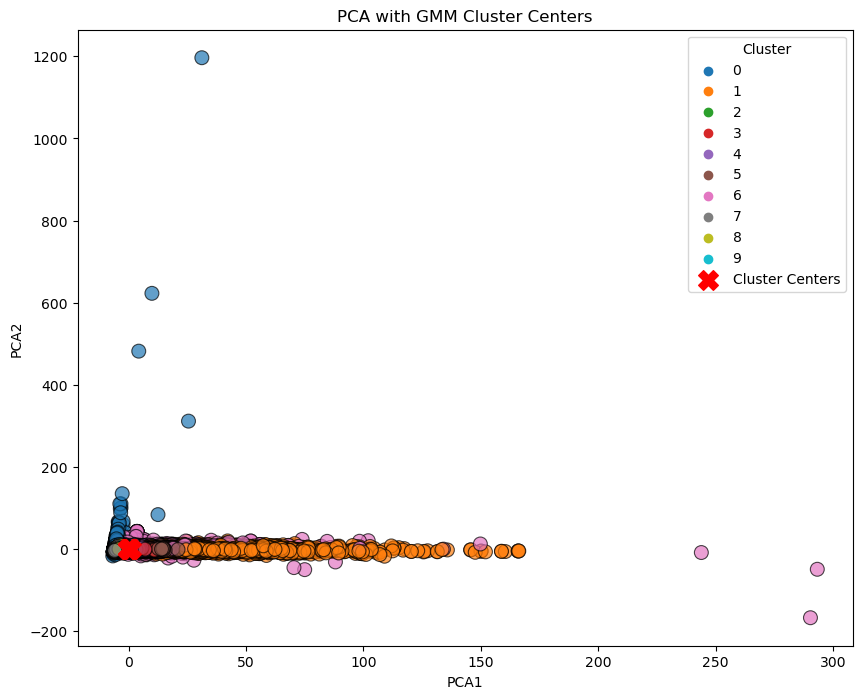

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. Visualize the distribution of data in the reduced 2D space (PCA)
# Use PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Plot the PCA visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100, edgecolor='k', alpha=0.7)
plt.title('PCA of Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# 2. Visualize the distribution of data using t-SNE (Non-linear dimensionality reduction)
# Use t-SNE to reduce to 2 dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Create a DataFrame with the t-SNE results and cluster labels
tsne_df = pd.DataFrame(X_tsne, columns=['tSNE1', 'tSNE2'])
tsne_df['Cluster'] = cluster_labels

# Plot the t-SNE visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x='tSNE1', y='tSNE2', hue='Cluster', palette='tab10', s=100, edgecolor='k', alpha=0.7)
plt.title('t-SNE of Clusters')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.legend(title='Cluster')
plt.show()

# 3. Visualize the distribution of features for each cluster (histograms or box plots)
# Choose a feature to visualize (e.g., 'flesch_kincaid_grade_level')
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_df, x='cluster', y='flesch_kincaid_grade_level', palette='tab10')
plt.title('Distribution of Flesch Kincaid Grade Level by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Flesch Kincaid Grade Level')
plt.show()

# 4. Visualize the cluster centers (Optional - GMM centers)
# The GaussianMixture model doesn't provide direct "centroid" like k-means,
# but we can visualize the "means" of each component
gmm_means = gmm.means_

# Plot the GMM centers
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100, edgecolor='k', alpha=0.7)
plt.scatter(gmm_means[:, 0], gmm_means[:, 1], color='red', marker='X', s=200, label='Cluster Centers')
plt.title('PCA with GMM Cluster Centers')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

## Link Analysis to build interaction networks based on inferred connections between users.
## Conduct Social Network Analysis to identify central users using metrics like PageRank.

Here, I am selecting the top 100 most active users,based on number of posts, to work on the Link analysis.

/var/folders/8j/w4cf450n1sscq6nksr6976b40000gn/T/ipykernel_64589/1238525972.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['user_idx'] = user_encoder.fit_transform(data_sample['author'])
/var/folders/8j/w4cf450n1sscq6nksr6976b40000gn/T/ipykernel_64589/1238525972.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['subreddit_idx'] = subreddit_encoder.fit_transform(data_sample['subreddit'])
/var/folders/8j/w4cf450n1sscq6nksr6976b40000gn/T/ipykernel_64589/1238525972.py:43: Settin

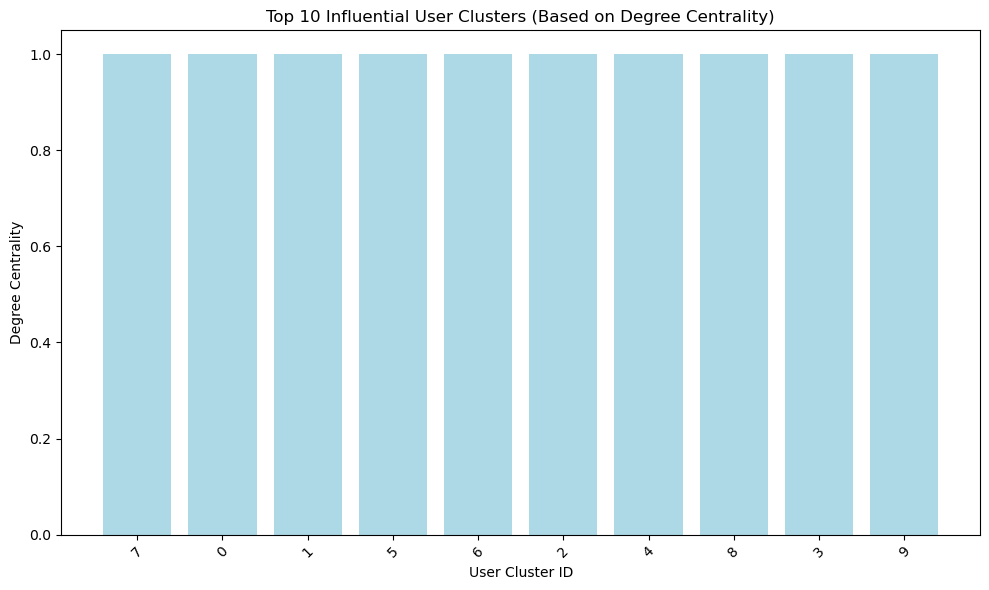

Most Influential User Clusters based on Degree Centrality:
Cluster ID: 7, Centrality: 1.0000
Cluster ID: 0, Centrality: 1.0000
Cluster ID: 1, Centrality: 1.0000
Cluster ID: 5, Centrality: 1.0000
Cluster ID: 6, Centrality: 1.0000
Cluster ID: 2, Centrality: 1.0000
Cluster ID: 4, Centrality: 1.0000
Cluster ID: 8, Centrality: 1.0000
Cluster ID: 3, Centrality: 1.0000
Cluster ID: 9, Centrality: 1.0000


/var/folders/8j/w4cf450n1sscq6nksr6976b40000gn/T/ipykernel_64589/1238525972.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


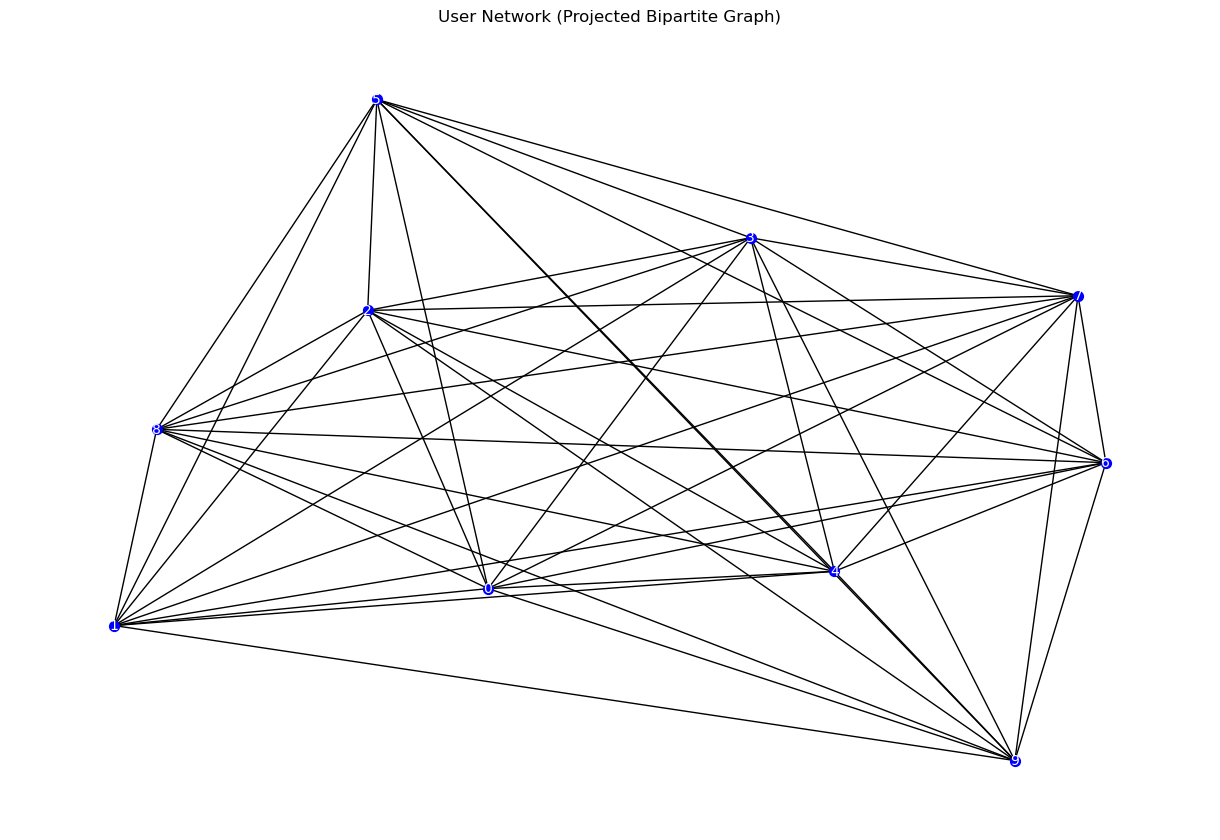

In [17]:
import pandas as pd
import networkx as nx
import numpy as np
import scipy.sparse as sp
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Ensure 'author' and 'subreddit' columns are of type string
data_df['author'] = data_df['author'].astype(str)
data_df['subreddit'] = data_df['subreddit'].astype(str)

# Step 1: Subset Data to Most Active Users
# Select the top 100 most active users based on the number of posts
top_users = data_df['author'].value_counts().head(100).index
data_sample = data_df[data_df['author'].isin(top_users)]

# Step 2: Encode 'author' and 'subreddit' to integer indices for memory efficiency
user_encoder = LabelEncoder()
subreddit_encoder = LabelEncoder()

data_sample['user_idx'] = user_encoder.fit_transform(data_sample['author'])
data_sample['subreddit_idx'] = subreddit_encoder.fit_transform(data_sample['subreddit'])

# Step 3: Create Sparse Interaction Matrix (user x subreddit)
interaction_matrix = sp.coo_matrix(
    (np.ones(len(data_sample)), (data_sample['user_idx'], data_sample['subreddit_idx'])),
    shape=(len(user_encoder.classes_), len(subreddit_encoder.classes_))
)

# Step 4: Apply KMeans Clustering to group users
# Select features to use for clustering (e.g., number of posts, sentiment, etc.)
features = data_sample[['sent_neg', 'sent_neu', 'sent_pos', 'n_words']]  # example features
features = features.dropna()

# Normalize the features for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering to group users (e.g., into 10 clusters)
kmeans = KMeans(n_clusters=10, random_state=42)
data_sample['user_cluster'] = kmeans.fit_predict(features_scaled)

# Step 5: Create Bipartite Graph Using User Clusters
B = nx.Graph()
user_clusters = data_sample['user_cluster'].unique()
subreddits = data_sample['subreddit'].unique()

# Add nodes for user clusters and subreddits
B.add_nodes_from(user_clusters, bipartite='users')
B.add_nodes_from(subreddits, bipartite='subreddits')

# Add edges between user clusters and subreddits
edges = list(zip(data_sample['user_cluster'], data_sample['subreddit']))
B.add_edges_from(edges)

# Step 6: Project Bipartite Graph onto User Clusters (Reduce Graph Size)
user_network = bipartite.weighted_projected_graph(B, user_clusters)

# Step 7: Visualize the Network
# Compute degree centrality (a measure of influence in the network)
centrality = nx.degree_centrality(user_network)

# Sort centrality values
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Plot the degree centrality of top 10 user clusters
top_10_clusters = sorted_centrality[:10]
top_10_cluster_ids = [cluster[0] for cluster in top_10_clusters]
top_10_centrality = [cluster[1] for cluster in top_10_clusters]

plt.figure(figsize=(10, 6))
plt.bar(range(10), top_10_centrality, tick_label=top_10_cluster_ids, color='lightblue')
plt.title('Top 10 Influential User Clusters (Based on Degree Centrality)')
plt.xlabel('User Cluster ID')
plt.ylabel('Degree Centrality')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: Analyze and Detect Influential Contributors
# Identify the most influential contributors by centrality
most_influential_clusters = sorted_centrality[:10]
print("Most Influential User Clusters based on Degree Centrality:")
for cluster, centrality_value in most_influential_clusters:
    print(f"Cluster ID: {cluster}, Centrality: {centrality_value:.4f}")

# Optionally, visualize the user network with a layout (e.g., spring layout)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(user_network, seed=42)
nx.draw(user_network, pos, node_size=50, node_color='blue', with_labels=True, font_size=10, font_color='white')
plt.title('User Network (Projected Bipartite Graph)')
plt.tight_layout()
plt.show()


### Top 10 Infulential Clusters using PageRank

In [26]:
pagerank = nx.pagerank(user_network)
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
top_pagerank_clusters = sorted_pagerank[:10]
print("Top 10 Influential Clusters (PageRank):")
for cluster, score in top_pagerank_clusters:
    print(f"Cluster ID: {cluster}, PageRank Score: {score:.4f}")


Top 10 Influential Clusters (PageRank):
Cluster ID: 6, PageRank Score: 0.1157
Cluster ID: 2, PageRank Score: 0.1135
Cluster ID: 8, PageRank Score: 0.1103
Cluster ID: 4, PageRank Score: 0.1102
Cluster ID: 7, PageRank Score: 0.1092
Cluster ID: 3, PageRank Score: 0.1059
Cluster ID: 0, PageRank Score: 0.1015
Cluster ID: 1, PageRank Score: 0.0938
Cluster ID: 5, PageRank Score: 0.0744
Cluster ID: 9, PageRank Score: 0.0657


### Top 10 influential clusters along with their sentiment engagement to understand what sort of content do they post

In [36]:
# Step 1: Compute PageRank to identify top 10 clusters
pagerank = nx.pagerank(user_network)

# Sort by PageRank score and select top 10 clusters
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
top_10_clusters = [cluster for cluster, _ in sorted_pagerank[:10]]

# Step 2: Filter the data_sample for these top 10 clusters
top_10_clusters_data = data_sample[data_sample['user_cluster'].isin(top_10_clusters)]

# Step 3: Calculate sentiment and engagement metrics for these top 10 clusters
cluster_profiles = top_10_clusters_data.groupby('user_cluster').agg({
    'sent_neg': 'mean',
    'sent_neu': 'mean',
    'sent_pos': 'mean',
    'n_words': 'mean'
}).reset_index()

# Step 4: Sort by 'n_words' to identify the most engaged clusters
cluster_profiles_sorted = cluster_profiles.sort_values(by='n_words', ascending=False)

# Step 5: Output the sorted cluster profiles
print(cluster_profiles_sorted)


   user_cluster  sent_neg  sent_neu  sent_pos      n_words
5             5  0.063800  0.793040  0.143160  1007.960000
0             0  0.125650  0.763153  0.111197   442.956204
7             7  0.145360  0.721514  0.133079   139.032710
2             2  0.145985  0.802131  0.051880   128.223938
3             3  0.242576  0.689085  0.068424   122.612121
6             6  0.045338  0.818267  0.136367   114.045833
8             8  0.056533  0.908491  0.035024   105.118343
1             1  0.224830  0.599651  0.175425    96.207547
4             4  0.063983  0.676917  0.259117    82.175000
9             9  0.401652  0.549630  0.048739    44.304348


### Top 10 influential profiles along with their sentiment engagement to understand what sort of content do they post

In [35]:
# Step 1: Compute PageRank to identify top 10 influencers
pagerank = nx.pagerank(user_network)

# Sort by PageRank score and select top 10 influencers
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
top_10_influencers = [user for user, _ in sorted_pagerank[:10]]

# Step 2: Filter the data_sample for these top influencers
top_10_influencers_data = data_sample[data_sample['author'].isin(user_encoder.inverse_transform(top_10_influencers))]

# Step 3: Calculate sentiment and engagement metrics for these top influencers
influencer_profiles = top_10_influencers_data.groupby('author').agg({
    'sent_neg': 'mean',
    'sent_neu': 'mean',
    'sent_pos': 'mean',
    'n_words': 'mean'
}).reset_index()

# Sort by 'n_words' to identify most engaged influencers
influencer_profiles_sorted = influencer_profiles.sort_values(by='n_words', ascending=False)

# Step 4: Output the sorted influencer profiles
print(influencer_profiles_sorted)


                author  sent_neg  sent_neu  sent_pos     n_words
3           CanaryButt  0.126308  0.744077  0.129462  248.153846
7              Code3LI  0.082538  0.829385  0.088000  223.230769
5              Cavenge  0.153533  0.740667  0.105667  203.066667
4             Cato4797  0.128929  0.744714  0.126571  168.357143
8  ConstructiveFeedbax  0.120133  0.727067  0.152800  164.933333
9    Ctown_struggles00  0.098000  0.794714  0.107357  146.357143
0             Anon2608  0.164917  0.706583  0.128667  116.250000
1        AutoModerator  0.065120  0.777600  0.157400   89.640000
2      CanadianAndroid  0.091857  0.751857  0.156357   79.642857
6       ChosenUndead24  0.180933  0.716133  0.103200   68.200000


### Link Analysis to build interaction networks based on inferred connections between users for the whole data 

Number of nodes (users): 2657
Number of edges (interactions): 1849


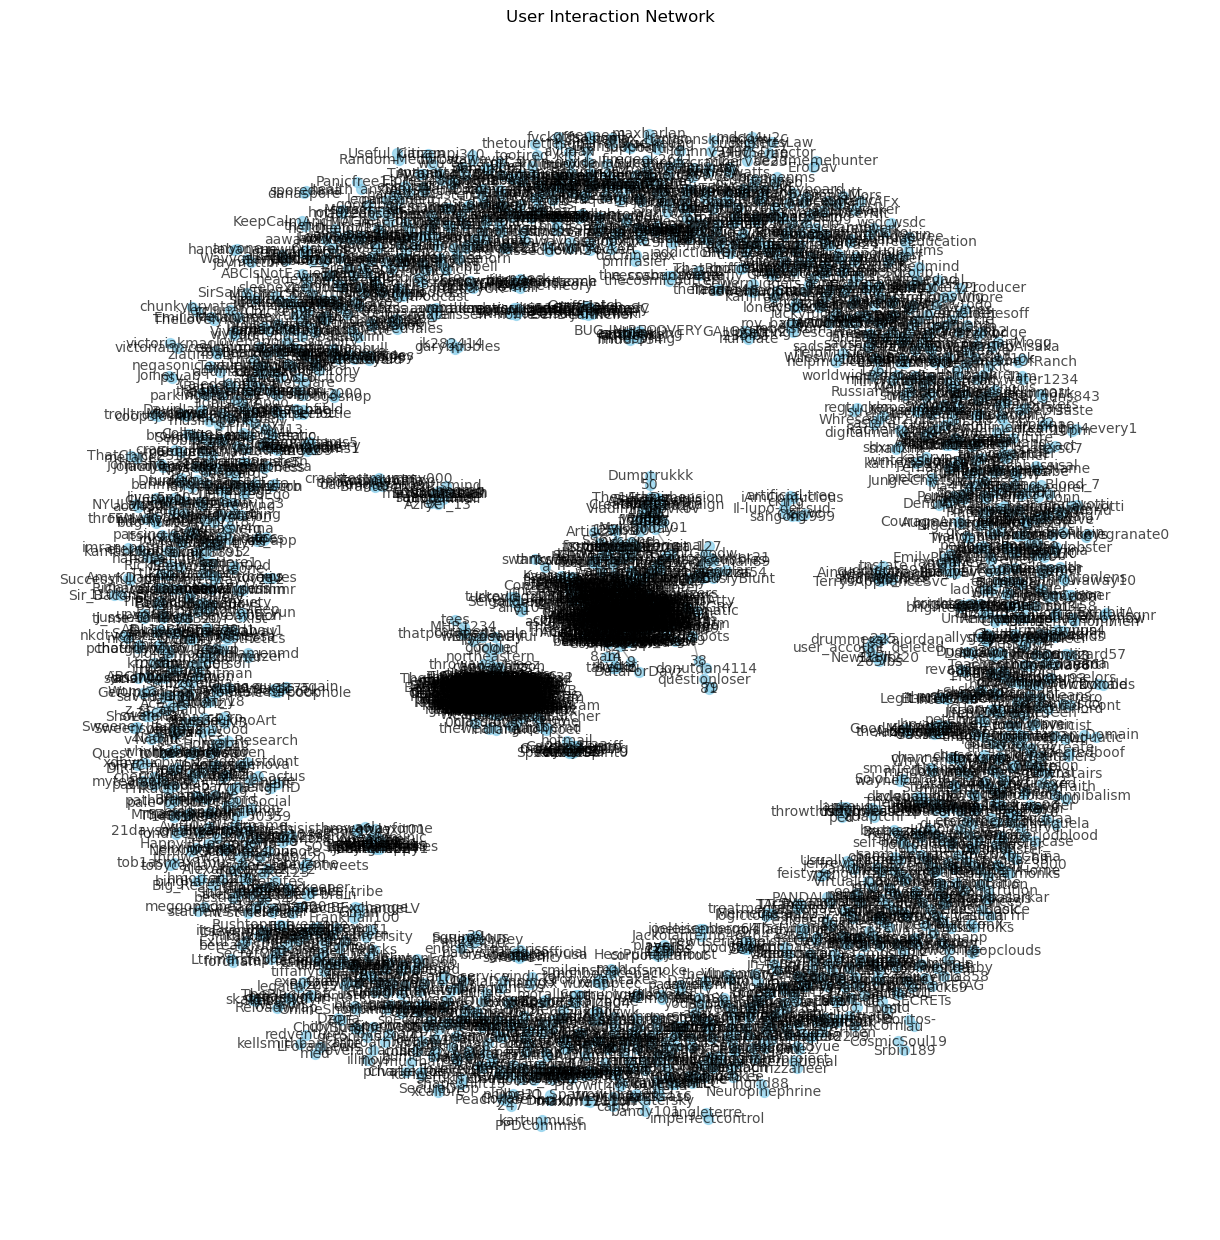

In [18]:
#Building the Interaction Network

import networkx as nx
import pandas as pd
import re

# 1. Extract mentions from posts (assuming that mentions are in the form of @username)
def extract_mentions(text):
    mentions = re.findall(r'@(\w+)', text)
    return mentions

# 2. Create interaction edges based on mentions between users
def create_interaction_graph(df):
    G = nx.Graph()  # Initialize an undirected graph
    for index, row in df.iterrows():
        author = row['author']
        post = row['post']
        
        mentions = extract_mentions(post)
        
        # Add edges for each mention (interaction between author and mentioned user)
        for mentioned_user in mentions:
            if author != mentioned_user:  # Avoid self-loops
                # Add edge between author and mentioned user (undirected)
                G.add_edge(author, mentioned_user)
    
    return G

# Create the interaction graph using the dataset
interaction_graph = create_interaction_graph(data_df)

# Print basic graph info
print("Number of nodes (users):", len(interaction_graph.nodes))
print("Number of edges (interactions):", len(interaction_graph.edges))

# Plot the graph (optional for small to medium-sized graphs)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
nx.draw(interaction_graph, with_labels=True, node_size=50, font_size=10, font_color='black', node_color='skyblue', edge_color='gray', alpha=0.7)
plt.title('User Interaction Network')
plt.show()


### Conduct Social Network Analysis to identify central users using metrics like PageRank for whole data

Top 10 Users by PageRank:
         user  pagerank_score
14      gmail        0.036894
496         3        0.008606
873         4        0.005303
99          5        0.004390
334         2        0.004106
722         6        0.003737
3       yahoo        0.002922
723         7        0.002316
161   hotmail        0.002186
1116        1        0.002062
Top 10 Users by Degree Centrality:
       user  degree_centrality
14    gmail           0.080572
496       3           0.025602
873       4           0.016943
99        5           0.013554
334       2           0.012425
722       6           0.011295
723       7           0.006401
3     yahoo           0.006024
464      10           0.004895
1116      1           0.004895


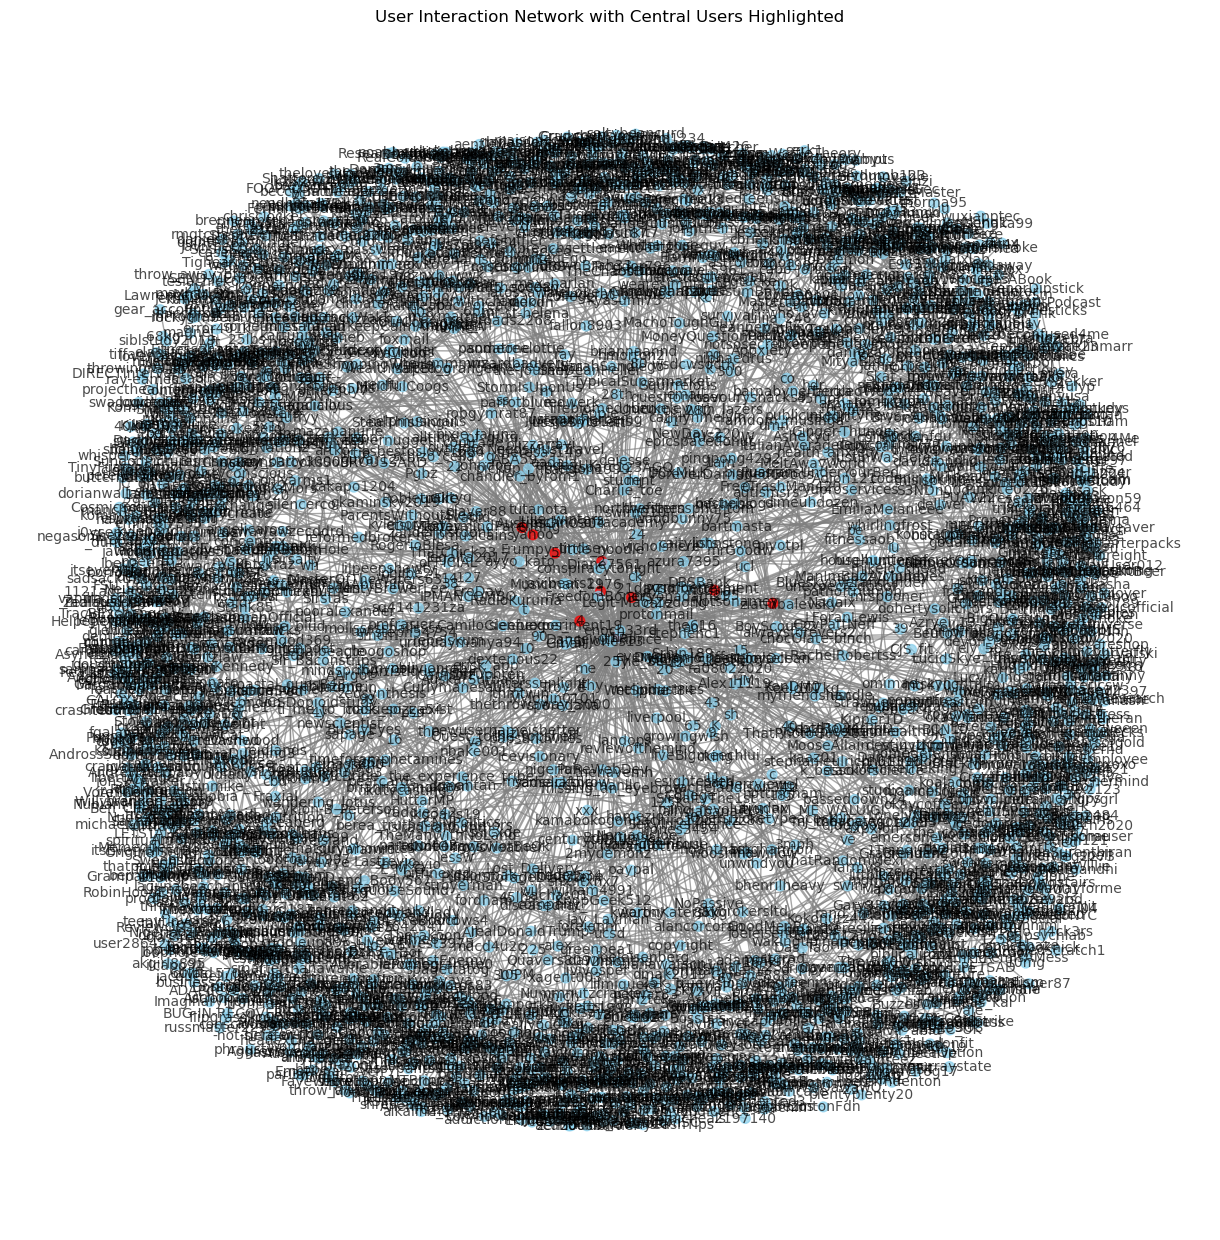

In [19]:
# Social Network Analysis (PageRank and Centrality)
# 3. Compute PageRank to find central users
pagerank_scores = nx.pagerank(interaction_graph, alpha=0.85)  # alpha is the damping factor, typically between 0.1 and 0.9

# Convert PageRank scores to a DataFrame for easy analysis
pagerank_df = pd.DataFrame(list(pagerank_scores.items()), columns=['user', 'pagerank_score'])
pagerank_df = pagerank_df.sort_values(by='pagerank_score', ascending=False)

# Show top 10 most influential users by PageRank
print("Top 10 Users by PageRank:")
print(pagerank_df.head(10))

# 4. Compute Degree Centrality (Number of connections each user has)
degree_centrality = nx.degree_centrality(interaction_graph)

# Convert degree centrality to DataFrame for easy analysis
degree_centrality_df = pd.DataFrame(list(degree_centrality.items()), columns=['user', 'degree_centrality'])
degree_centrality_df = degree_centrality_df.sort_values(by='degree_centrality', ascending=False)

# Show top 10 most connected users
print("Top 10 Users by Degree Centrality:")
print(degree_centrality_df.head(10))

# 5. Visualize the most central users (optional)
# We will highlight the top 10 most central users in the graph
top_10_users = set(pagerank_df.head(10)['user'])

# Plot the graph highlighting the top 10 central users
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(interaction_graph, k=0.15, iterations=20)
node_colors = ['red' if node in top_10_users else 'skyblue' for node in interaction_graph.nodes]
nx.draw(interaction_graph, pos, with_labels=True, node_size=50, font_size=10, font_color='black', node_color=node_colors, edge_color='gray', alpha=0.7)
plt.title('User Interaction Network with Central Users Highlighted')
plt.show()
